In [80]:
pip install retina-face

In [89]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [18]:
from retinaface import RetinaFace
import pprint
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np

In [82]:
# 얼굴 인식 및 정렬
faces = RetinaFace.extract_faces(img_path = "aespa.jpg", align = True)

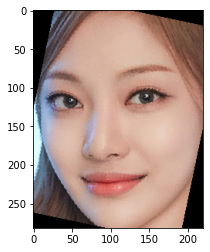

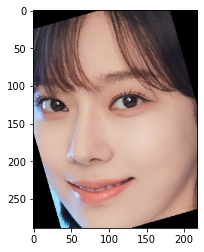

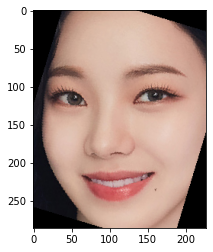

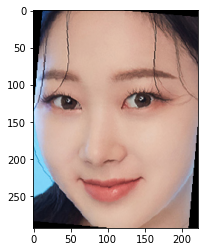

In [83]:
# 저장 및 출력
# 이 이미지를 사용할 경우 verify에서 얼굴 인식을 한 번 더 하여 verify가 안된다.
i = 0
for face in faces:

    plt.imsave(str(i) + '.jpg', face)
    plt.imshow(face)
    plt.show()
    i += 1

In [7]:
# 얼굴 위치 detection
detect = RetinaFace.detect_faces('aespa.jpg')
pprint.pprint(detect)

{'face_1': {'facial_area': [1807, 362, 2027, 644],
            'landmarks': {'left_eye': [1947.1671, 472.02548],
                          'mouth_left': [1968.5925, 566.7928],
                          'mouth_right': [1884.2754, 585.76196],
                          'nose': [1900.7216, 551.4854],
                          'right_eye': [1849.0876, 492.6632]},
            'score': 0.9995822310447693},
 'face_2': {'facial_area': [907, 381, 1125, 670],
            'landmarks': {'left_eye': [1036.9384, 512.4242],
                          'mouth_left': [1014.9461, 609.679],
                          'mouth_right': [932.1981, 587.50604],
                          'nose': [954.5311, 562.7484],
                          'right_eye': [941.22833, 484.90454]},
            'score': 0.9995397329330444},
 'face_3': {'facial_area': [1356, 329, 1583, 615],
            'landmarks': {'left_eye': [1502.5009, 431.1951],
                          'mouth_left': [1528.6187, 528.14465],
                      

In [8]:
def resize_bbox(bbox):
    x = bbox[0]
    y = bbox[1]
    w = bbox[2]
    h = bbox[3]
    return (x - 100, y - 100, w + 100, h + 100)
    

In [9]:
def euclidean_distance(a, b):
    x1 = a[0]; y1 = a[1]
    x2 = b[0]; y2 = b[1]
    return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))

In [36]:
def align_angle(left_eye, right_eye):
    # 회전 방향 결정
    if left_eye[1] <= right_eye[1]: # 오른쪽 눈이 높으면 시계방향
        direction = -1
        point_3rd = (right_eye[0], left_eye[1])
    else: # 반시계방향
        direction = 1
        point_3rd = (left_eye[0], right_eye[1])
        
    a = euclidean_distance(left_eye, point_3rd)
    b = euclidean_distance(right_eye, left_eye)
    c = euclidean_distance(right_eye, point_3rd)

    cos_a = (b*b + c*c - a*a)/(2*b*c)
    print("cos(a) = ", cos_a)

    angle = np.arccos(cos_a)
    print("angle: ", angle," in radian")

    angle = (angle * 180) / math.pi
    print("angle: ", angle," in degree")
    
    if direction == -1:
        angle = 90 - angle;
    return angle * direction

In [37]:
from PIL import Image

img = Image.open("aespa.jpg")
for k in detect:
    area = detect[k]['facial_area']
    area = resize_bbox(area)
    print(k + ": " + str(area))
    
    left_eye = detect[k]['landmarks']['left_eye']
    right_eye = detect[k]['landmarks']['right_eye']
    angle = align_angle(left_eye, right_eye)
    print(angle)
    
    cropped_img = img.crop(tuple(area))
    cropped_img = cropped_img.rotate(angle)
    
    cropped_img.save("db/" + k + '.jpg')
    # cropped_img.show()

face_1: (1707, 262, 2127, 744)
cos(a) =  0.20590943586370952
angle:  1.3634033593758181  in radian
angle:  78.11725826619262  in degree
-11.882741733807379
face_2: (807, 281, 1225, 770)
cos(a) =  0.9610612449432869
angle:  0.27997898778365515  in radian
angle:  16.041614352348276  in degree
16.041614352348276
face_3: (1256, 229, 1683, 715)
cos(a) =  0.289563494606506
angle:  1.2770255633361967  in radian
angle:  73.16817510948047  in degree
-16.831824890519528
face_4: (297, 284, 719, 777)
cos(a) =  0.09008525813549507
angle:  1.4805887759062026  in radian
angle:  84.83148805386624  in degree
-5.168511946133762


In [72]:
# verify
from deepface import DeepFace
obj = DeepFace.verify("db/face_3.jpg", "karinaID1.jpg")
print(obj)

{'verified': True, 'distance': 0.16661402717120433, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


In [78]:
# recognition
df = DeepFace.find("karinaID1.jpg", "db")
print(df)

Representations stored in  db / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  1.188152551651001  seconds
        identity  VGG-Face_cosine
0  db/face_3.jpg         0.166614
1  db/face_2.jpg         0.217918
2  db/face_1.jpg         0.254128
3  db/face_4.jpg         0.285385
